## R12725049 Assignment3

### 1(a)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
file_path_1 = r"./MDS_Assignment3_Steelplates.xlsx"
data = pd.read_excel(file_path_1,sheet_name=1)

In [3]:
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [4]:
print(data.describe())

         X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05        

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

### 1(b) 

In [6]:
print(data.duplicated().sum())

0


In [7]:
print(data.T.duplicated().sum())

0


- 由以上可得資料中沒有重複值

In [8]:
print(data.isnull().sum())

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64


- 由以上可得資料中沒有空值

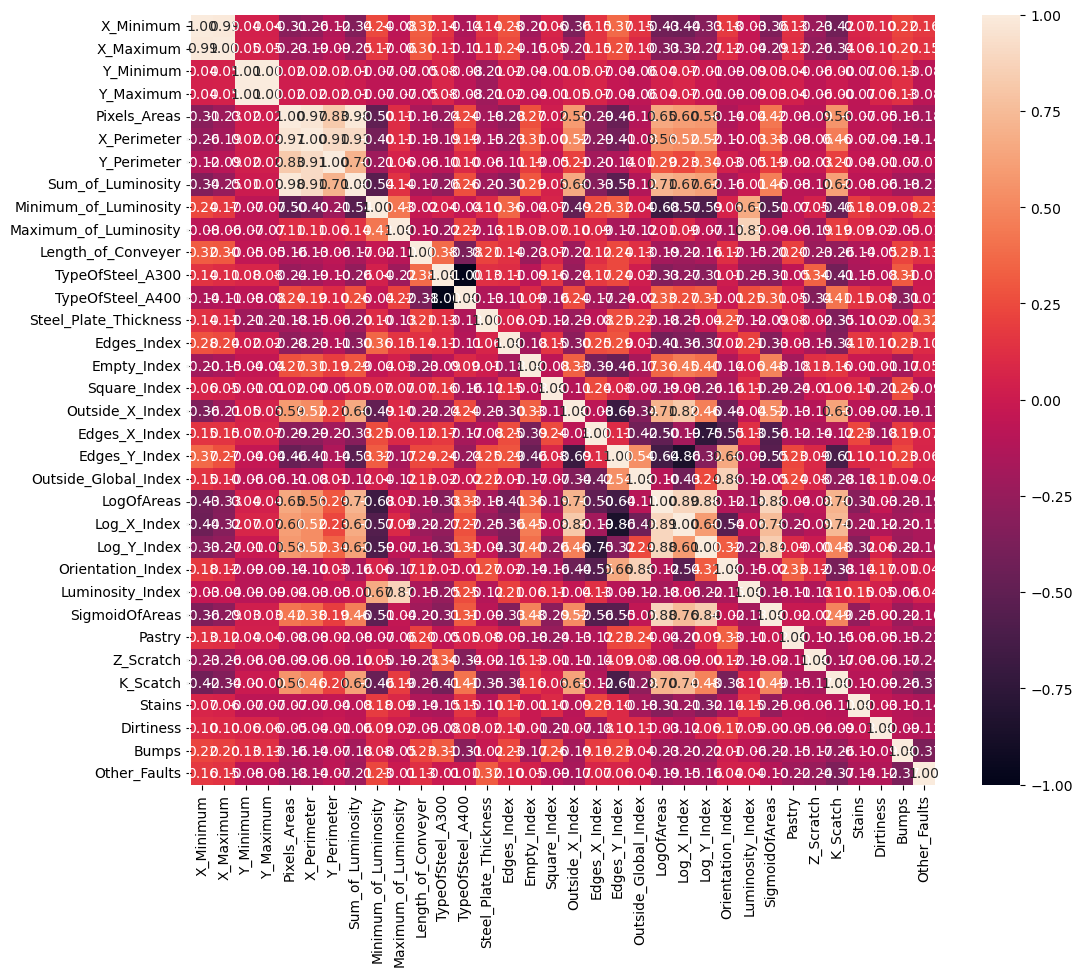

Highly Correlated Pairs: [('X_Minimum', 'X_Maximum'), ('X_Maximum', 'X_Minimum'), ('Y_Minimum', 'Y_Maximum'), ('Y_Maximum', 'Y_Minimum'), ('Pixels_Areas', 'X_Perimeter'), ('Pixels_Areas', 'Sum_of_Luminosity'), ('X_Perimeter', 'Pixels_Areas'), ('X_Perimeter', 'Y_Perimeter'), ('X_Perimeter', 'Sum_of_Luminosity'), ('Y_Perimeter', 'X_Perimeter'), ('Sum_of_Luminosity', 'Pixels_Areas'), ('Sum_of_Luminosity', 'X_Perimeter'), ('TypeOfSteel_A300', 'TypeOfSteel_A400'), ('TypeOfSteel_A400', 'TypeOfSteel_A300')]


In [9]:
# 計算相關矩陣
corr_matrix = data.corr()

# 可視化相關矩陣
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# 找出高度相關的列對
highly_correlated_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if (i != j and abs(corr_matrix[i][j]) > 0.9)]
print("Highly Correlated Pairs:", highly_correlated_pairs)

In [10]:
data = data.drop(["TypeOfSteel_A400", 'X_Perimeter'], axis=1)

#### 經相關性分析後，決定刪除TypeOfSteel_A400以及X_Perimeter兩欄位，原因如下
- ('TypeOfSteel_A300', 'TypeOfSteel_A400') 表示鋼材類型的二元特徵，通常情況下，這兩個特徵互為補充（一個為1時另一個為0），因此只需要保留其中一個即可。
- 許多資料都與X_Perimeter有高度相關，因而將其刪除
- 曾嘗試刪除過剩餘資料，但模型準確度不佳，因而雖然高度相關但還是保留

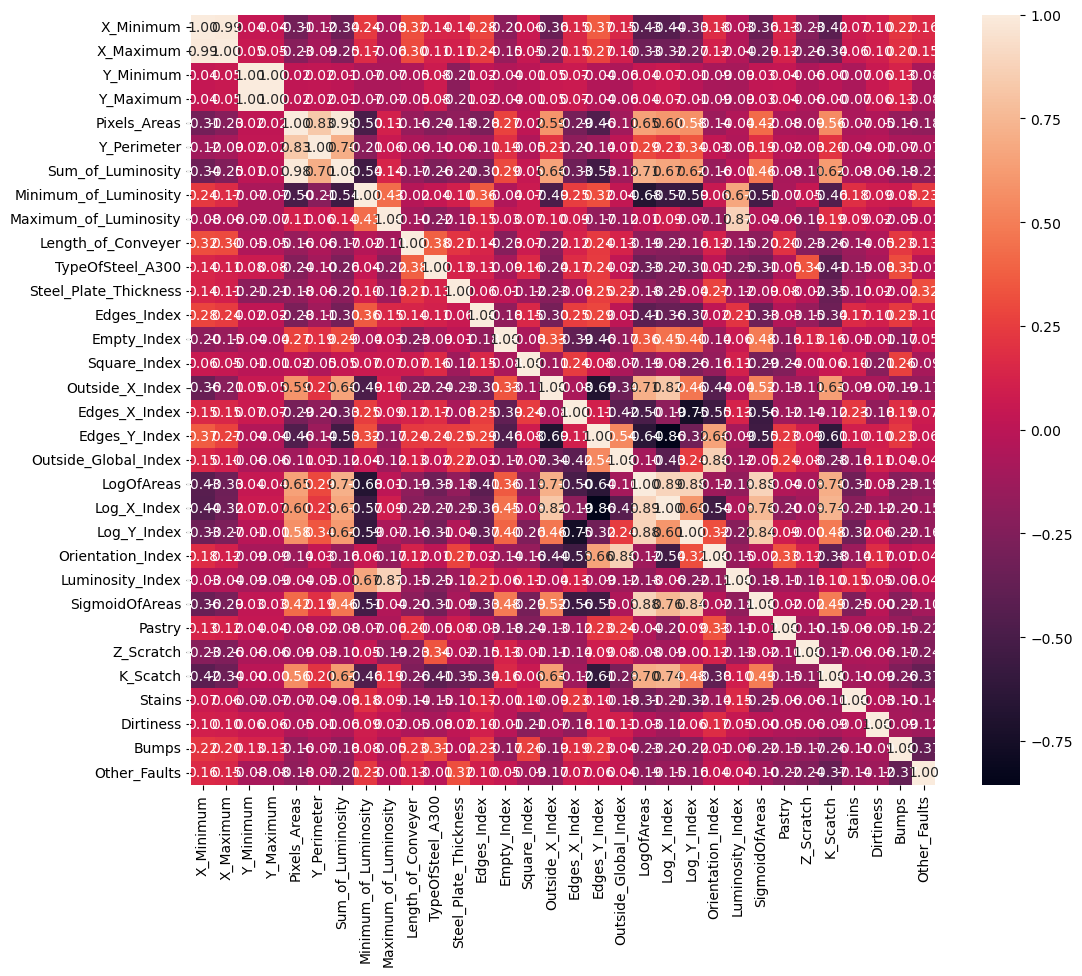

Highly Correlated Pairs: [('X_Minimum', 'X_Maximum'), ('X_Maximum', 'X_Minimum'), ('Y_Minimum', 'Y_Maximum'), ('Y_Maximum', 'Y_Minimum'), ('Pixels_Areas', 'Sum_of_Luminosity'), ('Sum_of_Luminosity', 'Pixels_Areas')]


In [11]:
# 計算相關矩陣
corr_matrix = data.corr()

# 可視化相關矩陣
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# 找出高度相關的列對
highly_correlated_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if (i != j and abs(corr_matrix[i][j]) > 0.9)]
print("Highly Correlated Pairs:", highly_correlated_pairs)

- 處理後再分析的結果

### 1(c)

In [12]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score

# 分離特徵和目標變量
X = data.iloc[:, :25]
y = data.iloc[:, 25:]

# 將多標籤轉換為單標籤
y_single_label = y.idxmax(axis=1)

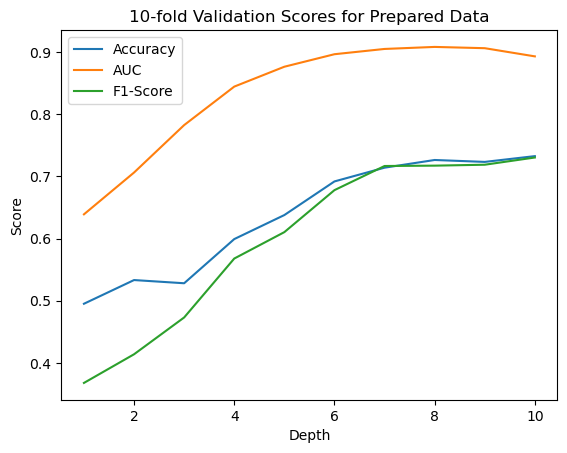

In [13]:
# 進行 10 折交叉驗證
kfold = StratifiedKFold(n_splits=10, shuffle=True)

depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
acc_scores_list = []
auc_scores_list = [] 
f1_scores_list = [] 

for i in depth:
    cart_classifier = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    acc_scores = cross_val_score(cart_classifier, X, y_single_label, cv=kfold, scoring='accuracy')
    auc_scores = cross_val_score(cart_classifier, X, y_single_label, cv=kfold, scoring='roc_auc_ovr')
    f1_scores = cross_val_score(cart_classifier, X, y_single_label, cv=kfold, scoring='f1_weighted')
    
    acc_scores_list.append(sum(acc_scores) / len(acc_scores))
    auc_scores_list.append(sum(auc_scores) / len(auc_scores))
    f1_scores_list.append(sum(f1_scores) / len(f1_scores))
    
plt.plot(depth, acc_scores_list, label='Accuracy')
plt.plot(depth, auc_scores_list, label='AUC')
plt.plot(depth, f1_scores_list, label='F1-Score')
plt.xlabel("Depth")
plt.ylabel('Score')
plt.title("10-fold Validation Scores for Prepared Data")
plt.legend()
plt.show()

In [14]:
# 因上述測試深度的結果以10為最佳，因此這邊選擇10做為超參數
cart_classifier = DecisionTreeClassifier(criterion = "gini", max_depth = 10)

acc_scores = cross_val_score(cart_classifier, X, y_single_label, cv=kfold, scoring='accuracy')
auc_scores = cross_val_score(cart_classifier, X, y_single_label, cv=kfold, scoring='roc_auc_ovr')
f1_scores = cross_val_score(cart_classifier, X, y_single_label, cv=kfold, scoring='f1_weighted')

In [15]:
print("CART Accuracy:", np.mean(acc_scores))
print("CART AUC:", np.mean(auc_scores))
print("CART F1 Score:", np.mean(f1_scores))

CART Accuracy: 0.7217948717948718
CART AUC: 0.8927713000287415
CART F1 Score: 0.7280182623289241


### 1(d)

In [16]:
from imblearn.over_sampling import SMOTE

# 假定 X 和 y 已經是您的特徵和目標變量
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y_single_label)

### 1(e)

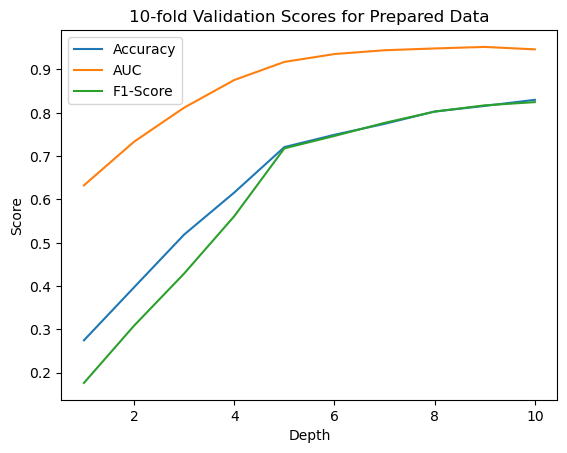

In [17]:
# 進行 10 折交叉驗證
kfold = StratifiedKFold(n_splits=10, shuffle=True)

depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
acc_scores_balanced_list = []
auc_scores_balanced_list = [] 
f1_scores_balanced_list = [] 

for i in depth:
    cart_classifier = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    acc_scores_balanced = cross_val_score(cart_classifier, X_balanced, y_balanced, cv=kfold, scoring='accuracy')
    auc_scores_balanced = cross_val_score(cart_classifier, X_balanced, y_balanced, cv=kfold, scoring='roc_auc_ovr')
    f1_scores_balanced = cross_val_score(cart_classifier, X_balanced, y_balanced, cv=kfold, scoring='f1_weighted')
    
    acc_scores_balanced_list.append(sum(acc_scores_balanced) / len(acc_scores_balanced))
    auc_scores_balanced_list.append(sum(auc_scores_balanced) / len(auc_scores_balanced))
    f1_scores_balanced_list.append(sum(f1_scores_balanced) / len(f1_scores_balanced))
    
plt.plot(depth, acc_scores_balanced_list, label='Accuracy')
plt.plot(depth, auc_scores_balanced_list, label='AUC')
plt.plot(depth, f1_scores_balanced_list, label='F1-Score')
plt.xlabel("Depth")
plt.ylabel('Score')
plt.title("10-fold Validation Scores for Prepared Data")
plt.legend()
plt.show()

In [18]:
# 因上述測試深度的結果以10為最佳，因此這邊選擇10做為超參數
cart_classifier_balanced = DecisionTreeClassifier(criterion = "gini", max_depth = 10)

# 10 折交叉驗證
acc_scores_balanced = cross_val_score(cart_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='accuracy')
auc_scores_balanced = cross_val_score(cart_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='roc_auc_ovr')
f1_scores_balanced = cross_val_score(cart_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='f1_weighted')

In [19]:
print("Balanced CART Accuracy:", np.mean(acc_scores_balanced))
print("Balanced CART AUC:", np.mean(auc_scores_balanced))
print("Balanced CART F1 Score:", np.mean(f1_scores_balanced))

Balanced CART Accuracy: 0.8267907265464753
Balanced CART AUC: 0.9472740471526852
Balanced CART F1 Score: 0.8200648990932363


- 可看出平衡數據集的各項指標表現有明顯提升

### 1(f)

使用SMOTE來處理數據不平衡問題。這種方法可以提高少數類別的樣本數量，而不會導致資訊量流失，同時也不太可能產生過大的計算負擔。

透過SMOTE創建合成樣本而非簡單複製現有樣本，也能有助於模型學習到更加豐富和多樣化的特徵表示套用了其解決資料不平衡的問題之後，不管是AUC、accuracy、f1等等都上升了很多。

代表資料不平衡真的是預測過程中需要被獨立出來處理的問題，否則模型可能會學習到一律去猜測最高機率的不良品情況。

### 1(g)

In [20]:
# 使用隨機森林在原始數據集上
rf_classifier = RandomForestClassifier()
acc_scores_rf = cross_val_score(rf_classifier, X, y_single_label, cv=kfold, scoring='accuracy')
auc_scores_rf = cross_val_score(rf_classifier, X, y_single_label, cv=kfold, scoring='roc_auc_ovr')
f1_scores_rf = cross_val_score(rf_classifier, X, y_single_label, cv=kfold, scoring='f1_weighted')

# 使用隨機森林在平衡數據集上
rf_classifier_balanced = RandomForestClassifier()
acc_scores_rf_balanced = cross_val_score(rf_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='accuracy')
auc_scores_rf_balanced = cross_val_score(rf_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='roc_auc_ovr')
f1_scores_rf_balanced = cross_val_score(rf_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='f1_weighted')

In [21]:
print("Random Forest - Original Dataset - Accuracy:", np.mean(acc_scores_rf))
print("Random Forest - Original Dataset - AUC:", np.mean(auc_scores_rf))
print("Random Forest - Original Dataset - F1 Score:", np.mean(f1_scores_rf))
print("Random Forest - Balanced Dataset - Accuracy:", np.mean(acc_scores_rf_balanced))
print("Random Forest - Balanced Dataset - AUC:", np.mean(auc_scores_rf_balanced))
print("Random Forest - Balanced Dataset - F1 Score:", np.mean(f1_scores_rf_balanced))

Random Forest - Original Dataset - Accuracy: 0.7892968543484008
Random Forest - Original Dataset - AUC: 0.9638280696354478
Random Forest - Original Dataset - F1 Score: 0.7909638116394899
Random Forest - Balanced Dataset - Accuracy: 0.9133951383641008
Random Forest - Balanced Dataset - AUC: 0.9901943754224923
Random Forest - Balanced Dataset - F1 Score: 0.9125875372088498


- 在平衡的資料集中，對於隨機森林的Accuracy值以及F1值都有明顯的提升。

### 1(h)

In [22]:
k5_fold = StratifiedKFold(n_splits=5, shuffle=True)

# 在原始數據集上使用 GBDT
gbdt_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
acc_scores_gbdt = cross_val_score(gbdt_classifier, X, y_single_label, cv=kfold, scoring='accuracy')
auc_scores_gbdt = cross_val_score(gbdt_classifier, X, y_single_label, cv=kfold, scoring='roc_auc_ovr')
f1_scores_gbdt = cross_val_score(gbdt_classifier, X, y_single_label, cv=kfold, scoring='f1_weighted')

# 在平衡數據集上使用 GBDT
gbdt_classifier_balanced = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
acc_scores_gbdt_balanced = cross_val_score(gbdt_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='accuracy')
auc_scores_gbdt_balanced = cross_val_score(gbdt_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='roc_auc_ovr')
f1_scores_gbdt_balanced = cross_val_score(gbdt_classifier_balanced, X_balanced, y_balanced, cv=kfold, scoring='f1_weighted')

In [23]:
print("GBDT - Original Dataset - Accuracy:", np.mean(acc_scores_gbdt))
print("GBDT - Original Dataset - AUC:", np.mean(auc_scores_gbdt))
print("GBDT - Original Dataset - F1 Scores:", np.mean(f1_scores_gbdt))
print("GBDT - Balanced Dataset - Accuracy:", np.mean(acc_scores_gbdt_balanced))
print("GBDT - Balanced Dataset - AUC:", np.mean(auc_scores_gbdt_balanced))
print("GBDT - Balanced Dataset - F1 Scores:", np.mean(f1_scores_gbdt_balanced))

GBDT - Original Dataset - Accuracy: 0.8026751255617235
GBDT - Original Dataset - AUC: 0.9627813157821301
GBDT - Original Dataset - F1 Scores: 0.7950281554334186
GBDT - Balanced Dataset - Accuracy: 0.9036304832847529
GBDT - Balanced Dataset - AUC: 0.9887101413271664
GBDT - Balanced Dataset - F1 Scores: 0.9017931334566059


- 在平衡的資料集中，對於GBDT的Accuracy值以及F1值都有明顯的提升。

### 2(a)

In [10]:
import pandas as pd
import statsmodels.api as sm

file_path_2 = r"./MiningProcess_Flotation_Plant_Database.csv"
# 讀取數據
df = pd.read_csv(file_path_2, decimal=',')
# 將列名稱中的空格替換為下劃線
df.columns = df.columns.str.replace(' ', '_')

# 選擇自變量和因變量
X = df.drop(['date', '%_Iron_Concentrate', '%_Silica_Concentrate'], axis=1)
X = sm.add_constant(X)
y = df['%_Silica_Concentrate']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [11]:
# make model
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     %_Silica_Concentrate   R-squared:                       0.155
Model:                              OLS   Adj. R-squared:                  0.155
Method:                   Least Squares   F-statistic:                     5162.
Date:                  Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                          21:29:27   Log-Likelihood:            -8.5444e+05
No. Observations:                589962   AIC:                         1.709e+06
Df Residuals:                    589940   BIC:                         1.709e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -19.2977      0.331    -58.311      0.000     -19.946     -18.649
%_Iron_Feed                      0.0075      0.001      6.533      0.000       0.005       0.010
%_Silica_Feed                    0.0140      0.001     15.614      0.000       0.012       0.016
Starch_Flow                  -4.246e-05   1.25e-06    -33.979      0.000   -4.49e-05      -4e-05
Amina_Flow                       0.0023   2.24e-05    100.819      0.000       0.002       0.002
Ore_Pulp_Flow                   -0.0056      0.000    -26.788      0.000      -0.006      -0.005
Ore_Pulp_pH                     -0.1695      0.004    -38.090      0.000      -0.178      -0.161
Ore_Pulp_Density                -0.9971      0.027    -36.473      0.000      -1.051      -0.944
Flotation_Column_01_Air_Flow    -0.0081      0.000    -50.722      0.000      -0.008      -0.008
Flotation_Column_02_Air_Flow     0.0011   9.31e-05     11.894      0.000       0.001       0.001
Flotation_Column_03_Air_Flow    -0.0063      0.000    -34.232      0.000      -0.007      -0.006
Flotation_Column_04_Air_Flow     0.0923      0.001    113.895      0.000       0.091       0.094
Flotation_Column_05_Air_Flow     0.0085      0.000     20.172      0.000       0.008       0.009
Flotation_Column_06_Air_Flow    -0.0045      0.000    -27.177      0.000      -0.005      -0.004
Flotation_Column_07_Air_Flow     0.0044      0.000     25.760      0.000       0.004       0.005
Flotation_Column_01_Level       -0.0003   1.88e-05    -15.031      0.000      -0.000      -0.000
Flotation_Column_02_Level       -0.0001   1.68e-05     -7.746      0.000      -0.000   -9.69e-05
Flotation_Column_03_Level        0.0002    1.5e-05     14.910      0.000       0.000       0.000
Flotation_Column_04_Level       -0.0002   2.29e-05     -9.885      0.000      -0.000      -0.000
Flotation_Column_05_Level       -0.0014   2.75e-05    -52.652      0.000      -0.002      -0.001
Flotation_Column_06_Level        0.0002   2.18e-05      7.645      0.000       0.000       0.000
Flotation_Column_07_Level       -0.0003   2.52e-05    -11.618      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    61401.484   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82322.251
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                       3.352   Cond. No.                     8.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+05. This might indica

In [13]:
# 提取 p 值小於 0.05 的變量
significant_variables = results.pvalues[results.pvalues < 0.05]
print("Significant variables by OLS:", significant_variables.index.tolist())

Significant variables by OLS: ['const', '%_Iron_Feed', '%_Silica_Feed', 'Starch_Flow', 'Amina_Flow', 'Ore_Pulp_Flow', 'Ore_Pulp_pH', 'Ore_Pulp_Density', 'Flotation_Column_01_Air_Flow', 'Flotation_Column_02_Air_Flow', 'Flotation_Column_03_Air_Flow', 'Flotation_Column_04_Air_Flow', 'Flotation_Column_05_Air_Flow', 'Flotation_Column_06_Air_Flow', 'Flotation_Column_07_Air_Flow', 'Flotation_Column_01_Level', 'Flotation_Column_02_Level', 'Flotation_Column_03_Level', 'Flotation_Column_04_Level', 'Flotation_Column_05_Level', 'Flotation_Column_06_Level', 'Flotation_Column_07_Level']


In [34]:
clf = LinearRegression()
# Build step forward feature selection
sfs2 = SFS(clf, k_features=22, forward=True, floating=False, scoring="r2", n_jobs=-1)

# Perform SFFS
sfs2 = sfs2.fit(X_train, y_train)

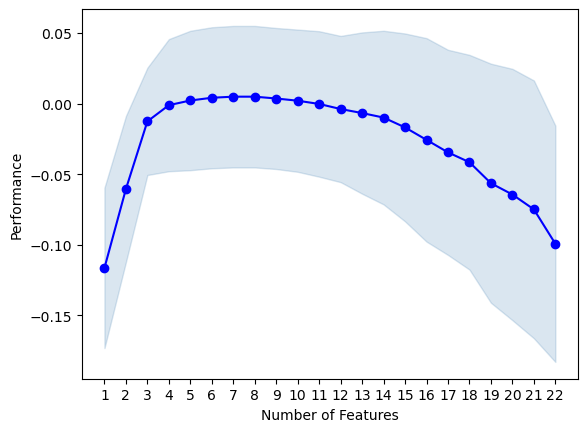

In [35]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err')

In [38]:
pd.DataFrame.from_dict(sfs2.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(19,)","[-0.07803410491882956, -0.316556198393251, -0....",-0.116342,"(Flotation_Column_05_Level,)",0.145897,0.113513,0.056757
2,"(8, 19)","[-0.1796707593733735, -0.172008192278174, 0.08...",-0.060448,"(Flotation_Column_01_Air_Flow, Flotation_Colum...",0.132861,0.10337,0.051685
3,"(8, 11, 19)","[-0.09116833096931165, -0.08469661036295317, 0...",-0.012556,"(Flotation_Column_01_Air_Flow, Flotation_Colum...",0.097628,0.075958,0.037979
4,"(4, 8, 11, 19)","[-0.08549224547956635, -0.09852586669211605, 0...",-0.001086,"(Amina_Flow, Flotation_Column_01_Air_Flow, Flo...",0.120243,0.093553,0.046776
5,"(2, 4, 8, 11, 19)","[-0.0860711124173843, -0.08855586977322205, 0....",0.002223,"(%_Silica_Feed, Amina_Flow, Flotation_Column_0...",0.126853,0.098696,0.049348
6,"(2, 4, 8, 10, 11, 19)","[-0.09884170732046504, -0.07998425216502025, 0...",0.004153,"(%_Silica_Feed, Amina_Flow, Flotation_Column_0...",0.128335,0.099849,0.049925
7,"(2, 4, 8, 10, 11, 19, 21)","[-0.10019764054293145, -0.07828175328455655, 0...",0.004928,"(%_Silica_Feed, Amina_Flow, Flotation_Column_0...",0.128769,0.100186,0.050093
8,"(0, 2, 4, 8, 10, 11, 19, 21)","[-0.10019764054293279, -0.07828175328455744, 0...",0.004928,"(const, %_Silica_Feed, Amina_Flow, Flotation_C...",0.128769,0.100186,0.050093
9,"(0, 2, 4, 8, 9, 10, 11, 19, 21)","[-0.10086022051752108, -0.08060947957706444, 0...",0.003634,"(const, %_Silica_Feed, Amina_Flow, Flotation_C...",0.128336,0.09985,0.049925
10,"(0, 2, 4, 8, 9, 10, 11, 19, 20, 21)","[-0.10523613426699163, -0.08128331143157919, 0...",0.002075,"(const, %_Silica_Feed, Amina_Flow, Flotation_C...",0.129418,0.100692,0.050346


In [36]:
# Build step forward feature selection
sfs = SFS(clf, k_features='best', forward=True, floating=False, scoring="r2", n_jobs=-1)

# Perform SFS
sfs = sfs.fit(X_train, y_train)
print('Selected features by Stepwise Regression:', list(sfs.k_feature_names_))

Selected features by Stepwise Regression: ['const', '%_Silica_Feed', 'Amina_Flow', 'Flotation_Column_01_Air_Flow', 'Flotation_Column_03_Air_Flow', 'Flotation_Column_04_Air_Flow', 'Flotation_Column_05_Level', 'Flotation_Column_07_Level']


### 2(b)

因為逐步回歸(forward selection)方法在選擇特徵值時會考慮到變量之間的相互作用和共線性，從而選擇出對目標變量預測貢獻最大的一組變量，因此有些在線性回歸中被選擇到的特徵值在逐步回歸並沒有被選擇。

且從視覺化的圖表中可看出，選擇太多特徵質反而會導致performance下降

### 2(c)

- Ridge 回歸 (L2 penalty)：透過添加一個等於權重平方和的懲罰項到損失函數中。

- Lasso 回歸 (L1 penalty)：添加的懲罰項是權重的絕對值之和。這種方法會導致某些係數直接為零，從而實現變量選擇。

### 2(d)

Elastic Net 結合了 Ridge 和 Lasso 的特點，它同時具有 L1 和 L2 正則化項。
- 當 p > n, lasso 表現較好
- 當 n > p, ridge 表現較好

### 2(e)

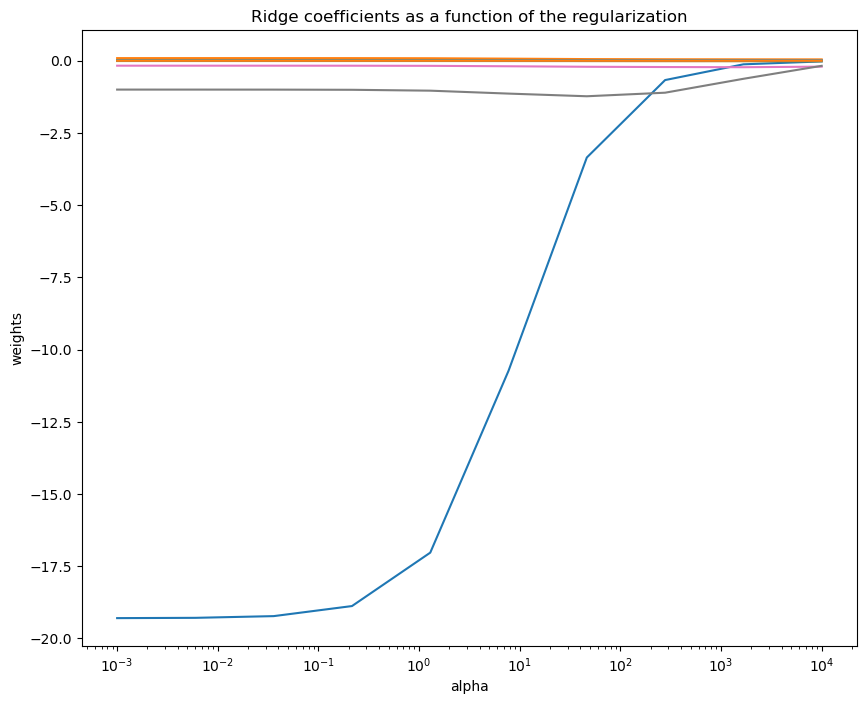

In [42]:
# Compute paths

n_alphas = 30
alphas = np.logspace(-3, 4, 10)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

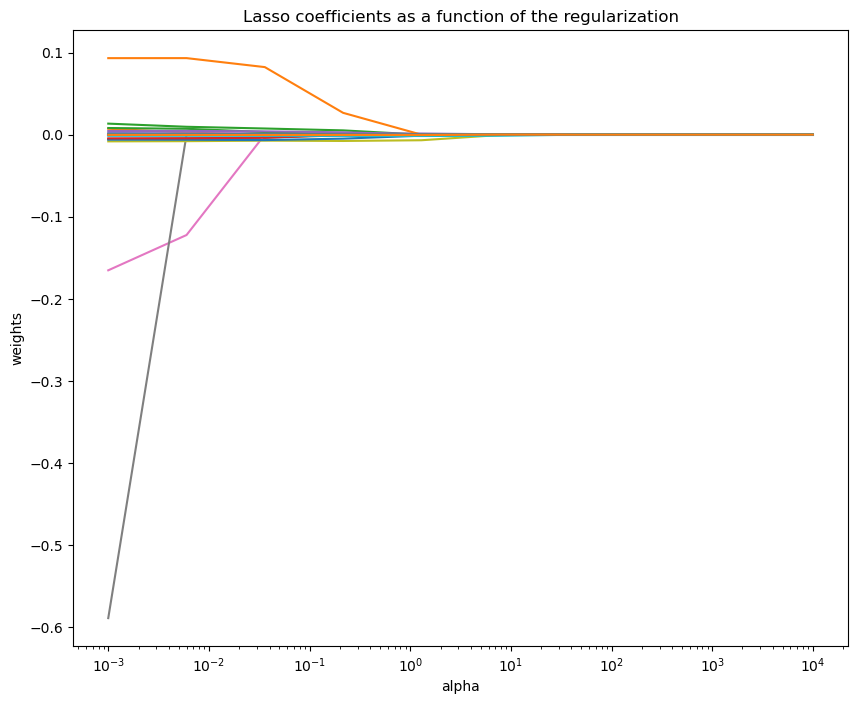

In [46]:
# Compute paths

n_alphas = 30
alphas = np.logspace(-3, 4, 10)

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Display results

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [26]:
lasso_cv = linear_model.LassoCV(cv=5, random_state=0, max_iter=5000).fit(X_train, y_train)
lasso_cv.alpha_

0.10760059170237818

In [27]:
lasso_cv.coef_

array([ 0.00000000e+00, -0.00000000e+00,  6.76457052e-03, -6.36675507e-05,
        1.59589934e-03, -2.48009531e-03, -0.00000000e+00, -0.00000000e+00,
       -7.47879021e-03,  5.71441535e-05, -5.68899875e-03,  5.85535913e-02,
        0.00000000e+00, -1.29535815e-03,  2.69818013e-03, -1.87001465e-04,
       -2.18988828e-04,  2.48330678e-04, -2.63992599e-04, -1.45176105e-03,
        1.09929870e-04, -3.62183646e-04])

In [49]:
ridge_cv = linear_model.RidgeCV(cv=5, fit_intercept=False).fit(X_train, y_train)
ridge_cv.alpha_

10.0

In [50]:
ridge_cv.coef_

array([-9.50337158e+00, -1.41596593e-03,  7.33653367e-03, -4.15225958e-05,
        2.33274948e-03, -7.17098993e-03, -1.92445011e-01, -1.15466270e+00,
       -7.99220796e-03,  1.23324125e-03, -6.22035873e-03,  7.17597269e-02,
        1.14884974e-03, -4.22740763e-03,  4.79463115e-03, -2.43924250e-04,
       -1.41936594e-04,  2.23681731e-04, -2.45481290e-04, -1.49843109e-03,
        1.43078627e-04, -3.18516041e-04])

使用 Ridge 跟 Lasso 時，需要調整 alpha 值

不同的 alpha 會產生不同的收縮效果，因此利用 5-fold 來驗證在不同 alpha 值下模型的表現，其所對應的 lambda 算是比較好的值

In [60]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 定義一個函數來提取重要的變量名稱
def get_significant_features(model, feature_names):
    significant_features = [feature for feature, coef in zip(feature_names, model.coef_) if abs(coef) != 0]
    return significant_features

# Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# 獲取重要的變量名稱
ridge_features = get_significant_features(ridge, X.columns)
lasso_features = get_significant_features(lasso, X.columns)
elastic_net_features = get_significant_features(elastic_net, X.columns)

In [63]:
print("Important variables by Ridge:", ridge_features)
print("")
print("Important variables by Lasso:", lasso_features)
print("")
print("Important variables by Elastic Net:", elastic_net_features)

Important variables by Ridge: ['%_Iron_Feed', '%_Silica_Feed', 'Starch_Flow', 'Amina_Flow', 'Ore_Pulp_Flow', 'Ore_Pulp_pH', 'Ore_Pulp_Density', 'Flotation_Column_01_Air_Flow', 'Flotation_Column_02_Air_Flow', 'Flotation_Column_03_Air_Flow', 'Flotation_Column_04_Air_Flow', 'Flotation_Column_05_Air_Flow', 'Flotation_Column_06_Air_Flow', 'Flotation_Column_07_Air_Flow', 'Flotation_Column_01_Level', 'Flotation_Column_02_Level', 'Flotation_Column_03_Level', 'Flotation_Column_04_Level', 'Flotation_Column_05_Level', 'Flotation_Column_06_Level', 'Flotation_Column_07_Level']

Important variables by Lasso: ['%_Silica_Feed', 'Starch_Flow', 'Amina_Flow', 'Ore_Pulp_Flow', 'Flotation_Column_01_Air_Flow', 'Flotation_Column_02_Air_Flow', 'Flotation_Column_03_Air_Flow', 'Flotation_Column_04_Air_Flow', 'Flotation_Column_06_Air_Flow', 'Flotation_Column_07_Air_Flow', 'Flotation_Column_01_Level', 'Flotation_Column_02_Level', 'Flotation_Column_03_Level', 'Flotation_Column_04_Level', 'Flotation_Column_05_Level

### 2(f)

Ridge 回歸通過對係數施加 L2 正則化來處理共線性，但它不會將係數減少到零，因此大多數變量仍然被保留在模型中。

Lasso 回歸和 Elastic Net 的結果相似。Lasso 回歸使用 L1 正則化，這有助於進行特徵選擇，將一些係數減少到零，從而從模型中排除某些變量。

### 2(g)

Adaptive Elastic Net 是一種結合了 Lasso 和 Ridge 的技術。它在 Elastic Net 的基礎上進行了改進，以優化處理具有高度共線性的數據集。

為什麼需要Adaptive Elastic Net？
- 變量選擇和共線性：傳統的 Lasso 雖然能進行有效的變量選擇，但在面對高度共線的特徵時可能無法正確識別所有相關變量。Ridge 回歸可以處理共線性問題，但不進行變量選擇。Elastic Net試圖結合這兩者的優點，但在某些情況下仍可能不夠有效。
- 改善模型的穩定性和預測能力：Adaptive Elastic Net 通過對不同變量施加不同程度的正則化，提高了模型對異常值和變量波動的魯棒性。

如何構建Adaptive Elastic Net？
- Adaptive Elastic Net 在 Elastic Net的基礎上引入了權重，這些權重用於調整各個特徵的正則化強度。這些權重通常基於某種領域知識，比如變量的重要性或是另一個模型的輸出。
- 在具體實現時，會對每個特徵的係數施加一個加權的 L1 正則化項和一個加權的 L2 正則化項。這些權重可以基於先前模型的係數大小，使得重要特徵受到較小的懲罰。

### 2(h)

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     %_Silica_Concentrate   R-squared:                       0.155
Model:                              OLS   Adj. R-squared:                  0.155
Method:                   Least Squares   F-statistic:                     5162.
Date:                  Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                          21:35:31   Log-Likelihood:            -8.5444e+05
No. Observations:                589962   AIC:                         1.709e+06
Df Residuals:                    589940   BIC:                         1.709e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -19.2977      0.331    -58.311      0.000     -19.946     -18.649
%_Iron_Feed                      0.0075      0.001      6.533      0.000       0.005       0.010
%_Silica_Feed                    0.0140      0.001     15.614      0.000       0.012       0.016
Starch_Flow                  -4.246e-05   1.25e-06    -33.979      0.000   -4.49e-05      -4e-05
Amina_Flow                       0.0023   2.24e-05    100.819      0.000       0.002       0.002
Ore_Pulp_Flow                   -0.0056      0.000    -26.788      0.000      -0.006      -0.005
Ore_Pulp_pH                     -0.1695      0.004    -38.090      0.000      -0.178      -0.161
Ore_Pulp_Density                -0.9971      0.027    -36.473      0.000      -1.051      -0.944
Flotation_Column_01_Air_Flow    -0.0081      0.000    -50.722      0.000      -0.008      -0.008
Flotation_Column_02_Air_Flow     0.0011   9.31e-05     11.894      0.000       0.001       0.001
Flotation_Column_03_Air_Flow    -0.0063      0.000    -34.232      0.000      -0.007      -0.006
Flotation_Column_04_Air_Flow     0.0923      0.001    113.895      0.000       0.091       0.094
Flotation_Column_05_Air_Flow     0.0085      0.000     20.172      0.000       0.008       0.009
Flotation_Column_06_Air_Flow    -0.0045      0.000    -27.177      0.000      -0.005      -0.004
Flotation_Column_07_Air_Flow     0.0044      0.000     25.760      0.000       0.004       0.005
Flotation_Column_01_Level       -0.0003   1.88e-05    -15.031      0.000      -0.000      -0.000
Flotation_Column_02_Level       -0.0001   1.68e-05     -7.746      0.000      -0.000   -9.69e-05
Flotation_Column_03_Level        0.0002    1.5e-05     14.910      0.000       0.000       0.000
Flotation_Column_04_Level       -0.0002   2.29e-05     -9.885      0.000      -0.000      -0.000
Flotation_Column_05_Level       -0.0014   2.75e-05    -52.652      0.000      -0.002      -0.001
Flotation_Column_06_Level        0.0002   2.18e-05      7.645      0.000       0.000       0.000
Flotation_Column_07_Level       -0.0003   2.52e-05    -11.618      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    61401.484   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82322.251
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                       3.352   Cond. No.                     8.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+05. This might indica

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

[60929.548405879854,
 19.12197994186258,
 18.91095679483649,
 1.3301420312971872,
 2.263651528640353,
 1.1003678956660643,
 1.3548533756644952,
 2.1846456041602256,
 13.4421252951126,
 4.517328830184048,
 16.61192471312957,
 2.2394771164287137,
 1.3563828793630652,
 11.413709913294609,
 11.585577459380014,
 3.6107952757894894,
 2.911605999611141,
 2.9749108315344603,
 2.2879774024607578,
 2.852182986668071,
 1.991081241257208,
 2.4510858995168747]

In [17]:
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,const,%_Iron_Feed,%_Silica_Feed,Starch_Flow,Amina_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,Flotation_Column_01_Air_Flow,Flotation_Column_02_Air_Flow,...,Flotation_Column_05_Air_Flow,Flotation_Column_06_Air_Flow,Flotation_Column_07_Air_Flow,Flotation_Column_01_Level,Flotation_Column_02_Level,Flotation_Column_03_Level,Flotation_Column_04_Level,Flotation_Column_05_Level,Flotation_Column_06_Level,Flotation_Column_07_Level
vif,60929.548406,19.12198,18.910957,1.330142,2.263652,1.100368,1.354853,2.184646,13.442125,4.517329,...,1.356383,11.41371,11.585577,3.610795,2.911606,2.974911,2.287977,2.852183,1.991081,2.451086


可看出有些欄位的VIF值大於10，因此可知這個資料集存在共線性問題。

### 2(i)

Yes，如果將 Iron Concentrate 納入考量，R-Square 值將大幅提高。如果我們測量 Iron Concentrate，或許也能測量到 Silica in Concentrate
但潛在的問題是，如果 Iron Concentrate 的影響太大，其他特徵可能變得非常不明顯，因此我們可以進行 normalize 來解決這個問題

### 3 

In [2]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 



Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
PriceDf = pd.read_csv('Brent Oil Futures Historical Data.csv')
PriceDf['Date'] = pd.to_datetime(PriceDf['Date'])
PriceDf.sort_values(by=['Date'], inplace=True, ignore_index=True)
PriceDf

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-11-17,43.75,43.89,44.25,43.08,226.35K,-0.16%
1,2020-11-18,44.34,43.75,44.89,43.48,242.88K,1.35%
2,2020-11-19,44.20,43.96,44.57,43.79,210.30K,-0.32%
3,2020-11-20,44.96,44.15,45.24,44.05,264.01K,1.72%
4,2020-11-23,46.06,45.08,46.12,44.89,267.25K,2.45%
...,...,...,...,...,...,...,...
772,2023-11-13,82.52,81.43,82.84,80.41,243.30K,1.34%
773,2023-11-14,82.47,82.71,83.97,82.06,248.94K,-0.06%
774,2023-11-15,81.18,82.39,83.04,80.79,299.42K,-1.56%
775,2023-11-16,77.48,80.92,81.16,76.61,NaN,-4.56%


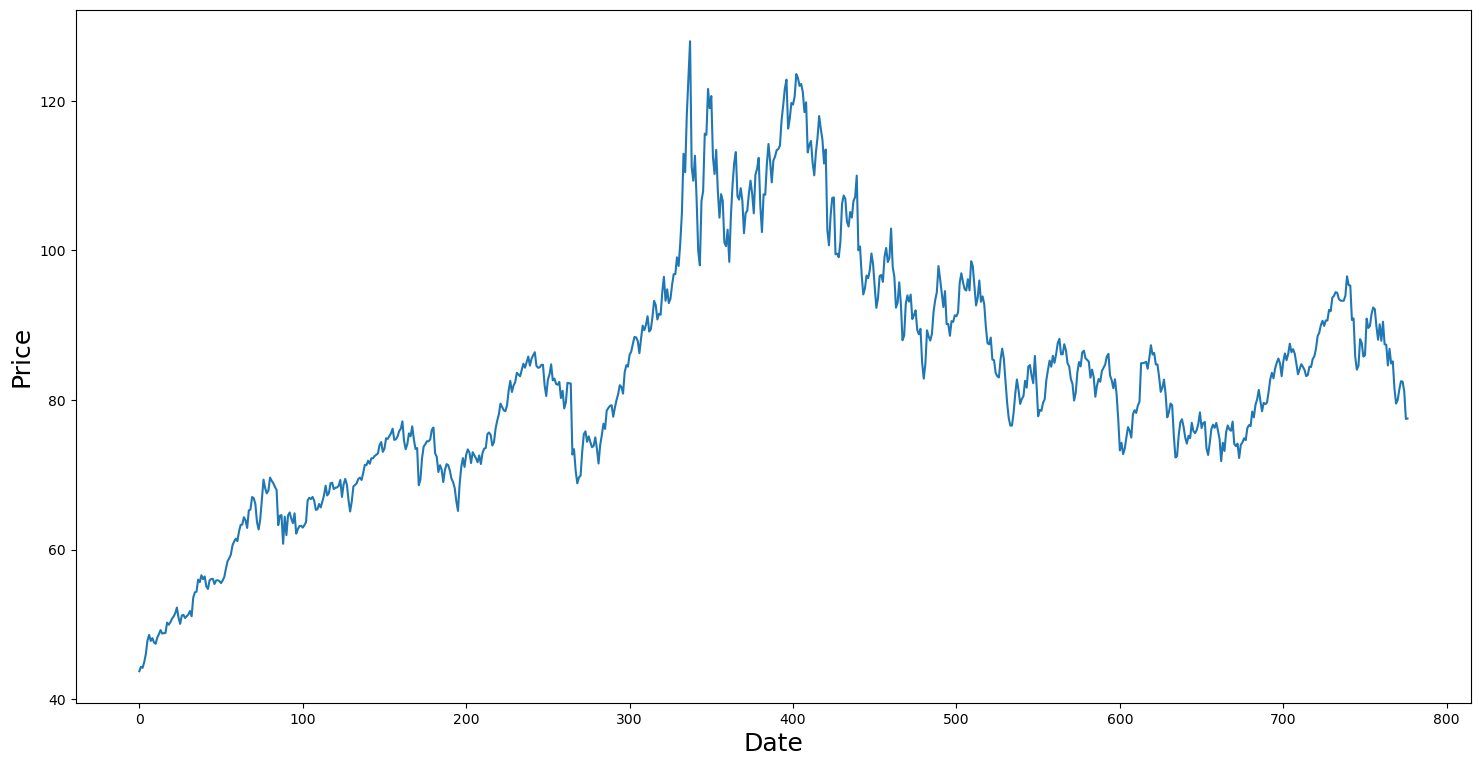

In [4]:
plt.figure(figsize = (18,9))
plt.plot(range(PriceDf.shape[0]),PriceDf['Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [5]:
trainingLen = 2000
priceData = PriceDf[['Price']]
scaler = MinMaxScaler()
scaler = scaler.fit(priceData)
scaledData = scaler.transform(priceData)

trainData = scaledData[:trainingLen, 0]
testData = scaledData[trainingLen:, 0]

In [6]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(trainData,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.         0.37765643 0.5486169  0.6261427  0.49115518]

	Output: [0.00700463 0.37765643 0.54125607 0.6261427  0.50267124]


Unrolled index 1
	Inputs:  [0.00700463 0.38501722 0.54125607 0.5771103  0.47999525]

	Output: [0.00700463 0.38501722 0.54125607 0.58269024 0.50267124]


Unrolled index 2
	Inputs:  [0.00534251 0.36720884 0.54944795 0.584946   0.49697256]

	Output: [0.04879497 0.3681586  0.56227    0.58269024 0.5052832 ]


Unrolled index 3
	Inputs:  [0.01436543 0.3681586  0.5634572  0.6172385  0.5173929 ]

	Output: [0.01436543 0.3681586  0.56227    0.53270805 0.48699987]


Unrolled index 4
	Inputs:  [0.02742491 0.37255135 0.53911906 0.58269024 0.50267124]

	Output: [0.02742491 0.38098064 0.58102816 0.58269024 0.50267124]


In [7]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 8 # Number of time steps you look into the future.
batch_size = 100 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.compat.v1.reset_default_graph() # This is important in case you run this multiple times

In [8]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [9]:
lstm_cells = [
    tf.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.compat.v1.glorot_uniform_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.compat.v1.glorot_uniform_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

C:\Users\tiger\AppData\Local\Temp\ipykernel_21524\2643559219.py:2: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  tf.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],


In [10]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



In [11]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations

TF Optimization operations
	All done


In [12]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
    sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [16]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 8 # Number of steps you continously predict for

train_seq_length = trainData.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(trainData,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(0, scaledData.size - n_predict_once, 8).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = scaledData[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = scaledData[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.squeeze(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-scaledData[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

Initialized
Average loss at step 1: 1.059740
	Test MSE: 0.12263
	Finished Predictions
Average loss at step 2: 0.562547
	Test MSE: 0.08893
	Finished Predictions
Average loss at step 3: 0.112204
	Test MSE: 0.05446
	Finished Predictions
Average loss at step 4: 0.181610
	Test MSE: 0.05902
	Finished Predictions
Average loss at step 5: 0.052145
	Test MSE: 0.06954
	Finished Predictions
Average loss at step 6: 0.095352
	Decreasing learning rate by 0.5
	Test MSE: 0.06251
	Finished Predictions
Average loss at step 7: 0.040149
	Test MSE: 0.05602
	Finished Predictions
Average loss at step 8: 0.030316
	Test MSE: 0.05271
	Finished Predictions
Average loss at step 9: 0.035317
	Test MSE: 0.05388
	Finished Predictions
Average loss at step 10: 0.030192
	Test MSE: 0.05610
	Finished Predictions
Average loss at step 11: 0.032283
	Decreasing learning rate by 0.5
	Test MSE: 0.05662
	Finished Predictions
Average loss at step 12: 0.028837
	Test MSE: 0.05604
	Finished Predictions
Average loss at step 13: 0.0302

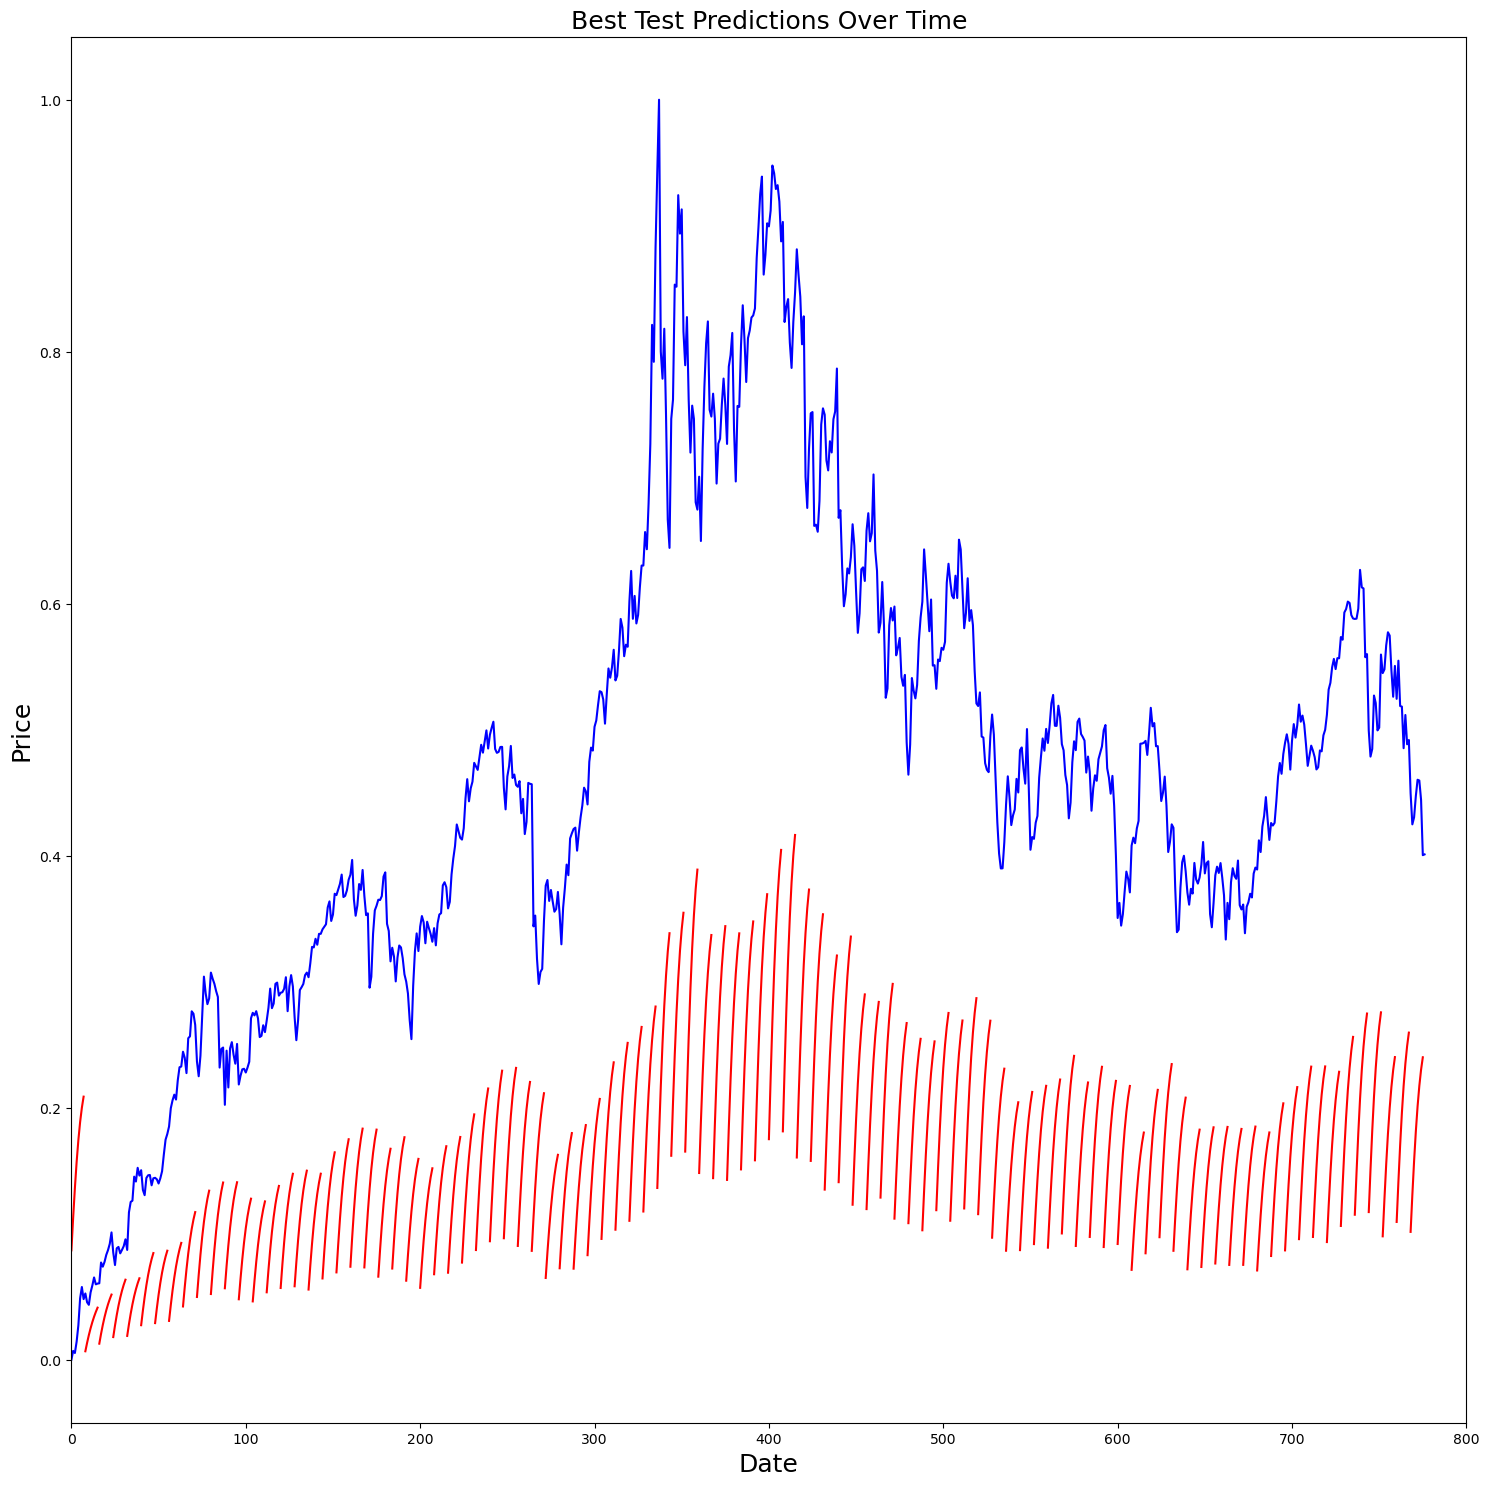

In [20]:
best_prediction_epoch = 16 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))

# Predicting the best test prediction you got
plt.plot(range(PriceDf.shape[0]),scaledData,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xlim(0,800)
plt.show()

## Refernce

- https://www.investing.com/commodities/brent-oil-historical-data
- https://github.com/PO-LAB/Manufacturing-Data-Science?fbclid=IwAR2muKhrgiYzaLHp6vJ3vwvogeQFg2o2At7n9PbUshepD9vAmvyhQwYrkzw#pushpin-python
- 課程講義